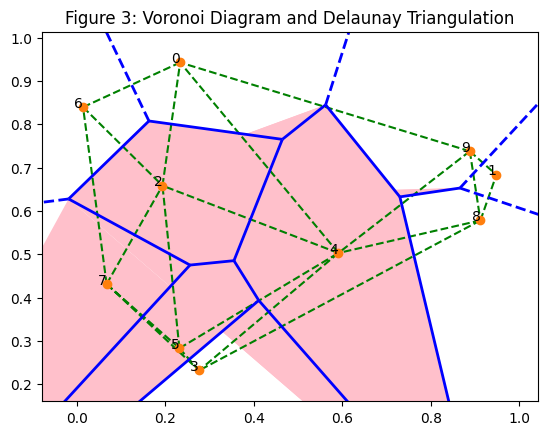

In [1]:
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay
import numpy as np

# Generate 10 random 2D points
points = np.random.rand(10, 2)

# Create Voronoi diagram
vor = Voronoi(points)

# Create Delaunay triangulation
tri = Delaunay(points)

# Plot Voronoi diagram
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='blue', line_width=2)

# Highlight the middle cell in red and its neighbors in pink
middle_point_index = np.argmin(np.sum((points - [0.5, 0.5])**2, axis=1))
middle_region_index = vor.point_region[middle_point_index]

ax.fill(*zip(*vor.vertices[vor.regions[middle_region_index]]), 'r')
for neighbor_region_index in vor.regions:
    if set(neighbor_region_index).intersection(vor.regions[middle_region_index]):
        ax.fill(*zip(*vor.vertices[neighbor_region_index]), 'pink')

# Plot Delaunay edges in green
ax.triplot(points[:, 0], points[:, 1], tri.simplices, 'g--')
ax.plot(points[:, 0], points[:, 1], 'o')

# Label points with numbers
for i, point in enumerate(points):
    ax.text(point[0], point[1], str(i), ha='right')

plt.title("Figure 3: Voronoi Diagram and Delaunay Triangulation")
plt.show()
# From here to probability density function between generators ...
# From there to using NNs to add distributions of the points. 

